## Importing Libraries

In [40]:
import pandas as pd
import sklearn as sc
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [41]:
dataset = pd.read_csv('Copy of kepler_data.csv')

## Column Correlation

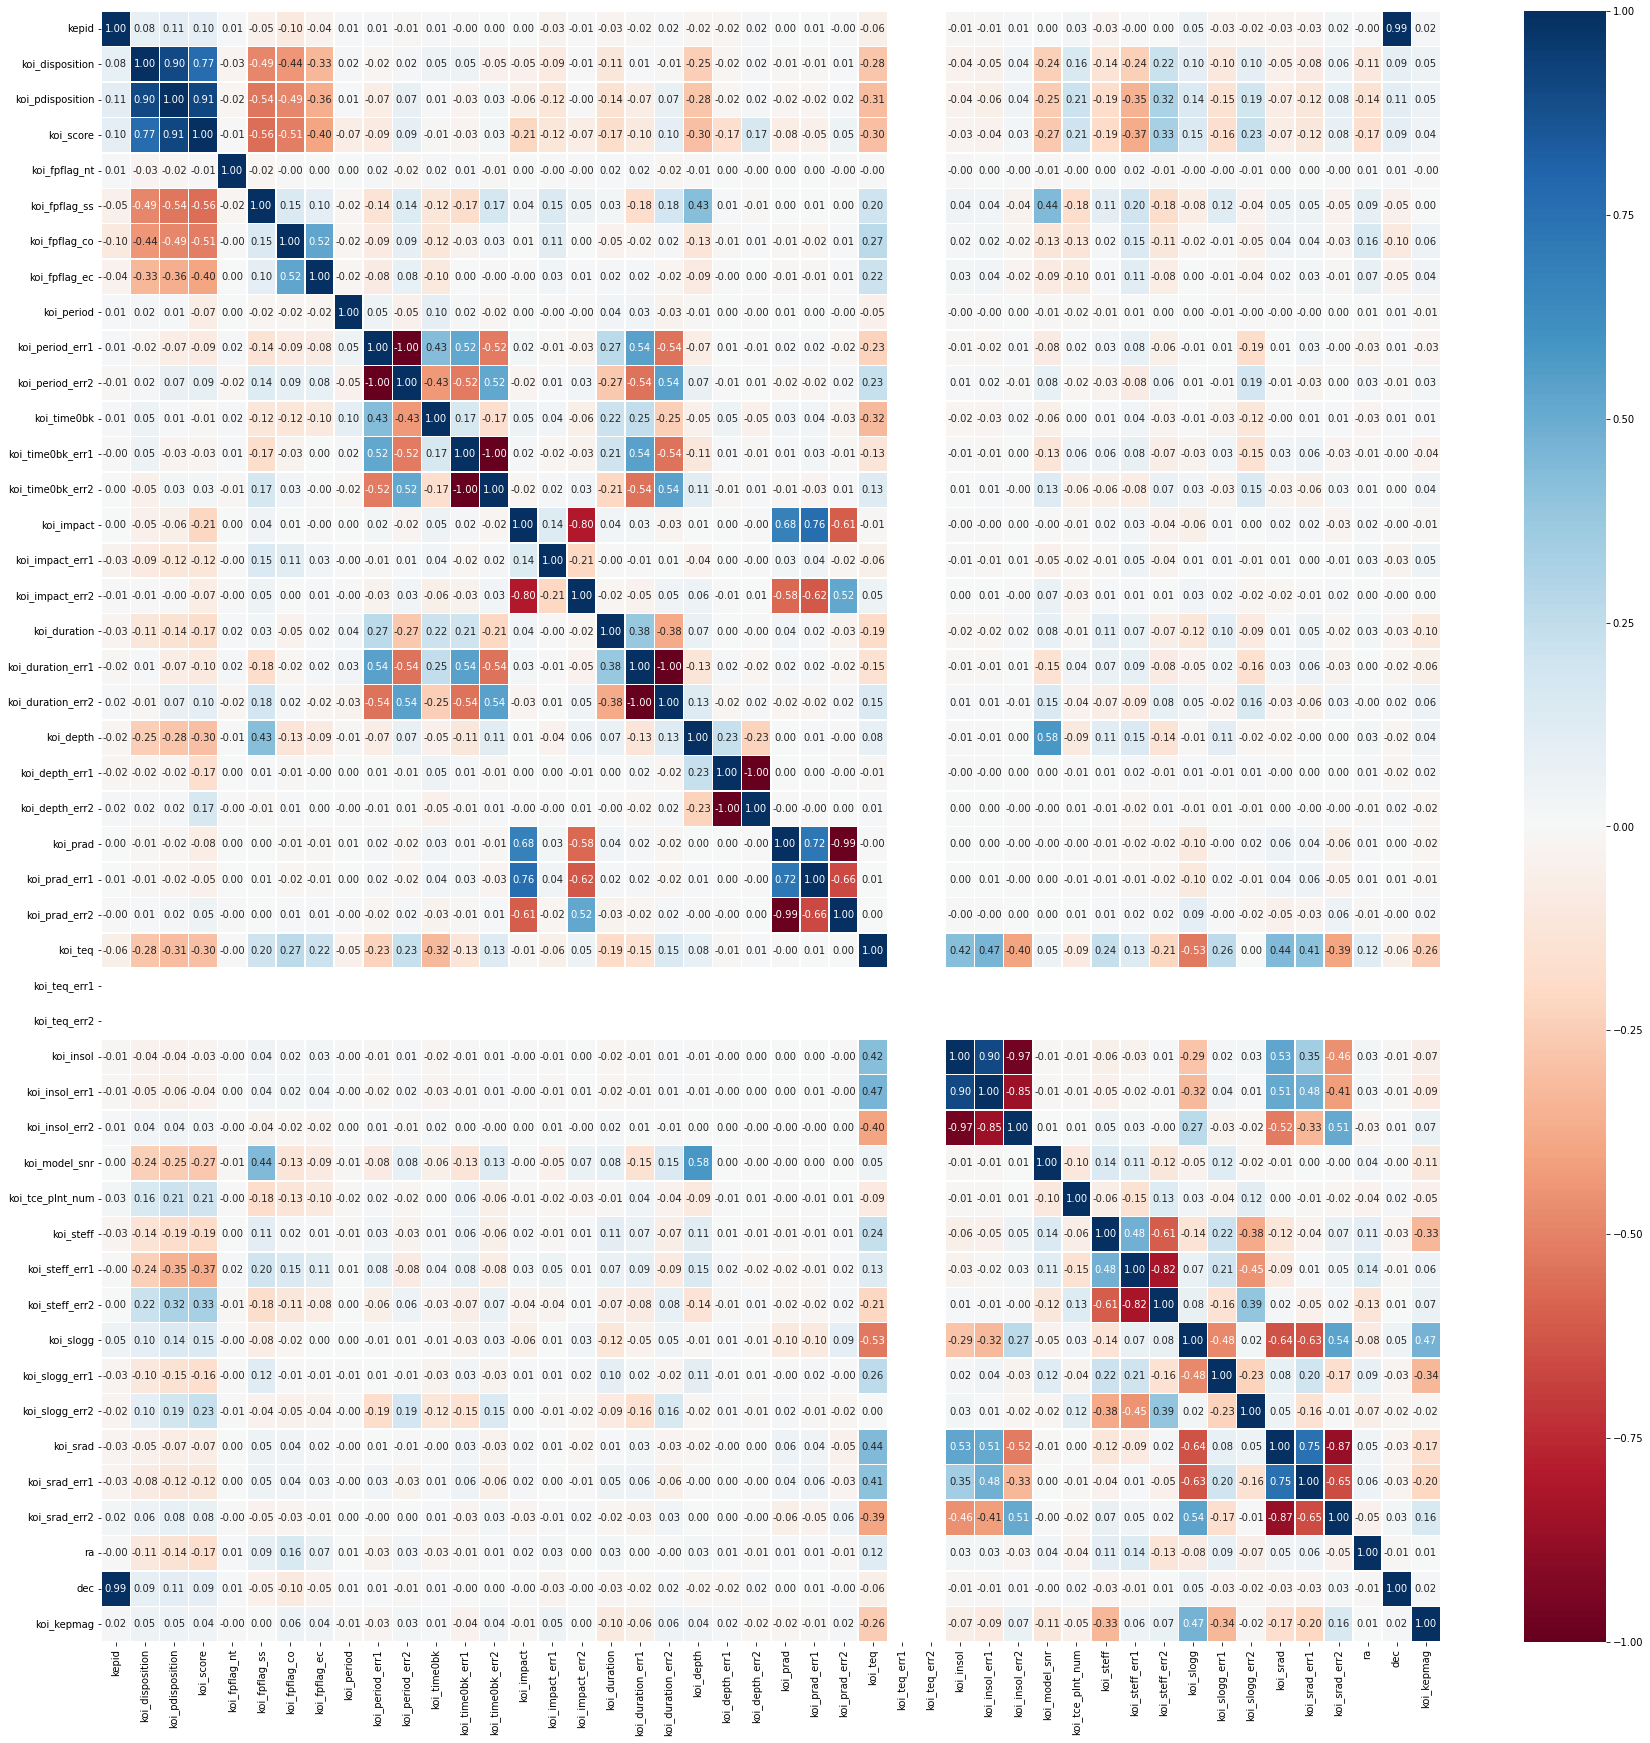

In [42]:
plt.figure(figsize=(30, 30))
sns.heatmap(dataset.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu')

## Splitting Dataset in matrix of features and dependent values

In [43]:
dataset = dataset.dropna(subset = ['koi_score', 'koi_steff_err2', 'koi_slogg_err2', 'koi_slogg', 'koi_tce_plnt_num'], how= 'any')
X = dataset.iloc[:, [4, 5, 35, 40, 42, 45]].values
Y = dataset.iloc[:, 3].values

In [44]:
X

array([[ 2.   ,  1.   ,  1.   ,  4.467, -0.096, -0.061],
       [ 2.   ,  0.969,  2.   ,  4.467, -0.096, -0.061],
       [ 2.   ,  0.   ,  1.   ,  4.544, -0.176, -0.078],
       ...,
       [ 0.   ,  0.021,  1.   ,  4.447, -0.224, -0.114],
       [ 2.   ,  0.092,  1.   ,  2.992, -0.027, -1.896],
       [ 0.   ,  0.   ,  1.   ,  4.385, -0.216, -0.137]])

In [45]:
Y

array([1, 1, 2, ..., 0, 2, 0])

## Splitting Dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 106)

In [47]:
from collections import Counter
Counter(Y_train)

Counter({0: 2857, 1: 1726, 2: 1336})

## Standard Scalar

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0]] = sc.fit_transform(X_train[:, [0]])
X_test[:, [0]] = sc.transform(X_test[:, [0]])

## Training model

### XGB Classifier

In [49]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate = 0.04, n_estimators = 100, max_depth = 4, colsample_bytree = 1)
classifier.fit(X_train, Y_train)

XGBClassifier(learning_rate=0.04, max_depth=4, objective='multi:softprob')

## Accuracy of different model

In [50]:
Y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[952   0   0]
 [  0 516  91]
 [  0 175 239]]


0.8651799290420679

## k-Fold Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.05 %
Standard Deviation: 1.39 %
